In [14]:
# import all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv('customers.csv')# load the data
print(df.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [17]:
print(df.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [26]:
#data cleaning
missing = df.isnull().sum()
print("Missing values:\n", missing)
# identify the missing value

Missing values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [28]:
duplicates = df.duplicated().sum()

In [30]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])# Convert SignupDate to datetime .The SignupDate column should be converted to a datetime format for proper analysis.

In [33]:
region_counts = df['Region'].value_counts()

In [34]:
df['SignupMonth'] = df['SignupDate'].dt.to_period('M')  # Add a column for month-year
signups_over_time = df['SignupMonth'].value_counts().sort_index()

In [36]:
missing, duplicates, region_counts, signups_over_time.head()

(CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 0,
 South America    59
 Europe           50
 North America    46
 Asia             45
 Name: Region, dtype: int64,
 2022-01    1
 2022-02    7
 2022-03    8
 2022-04    8
 2022-05    8
 Freq: M, Name: SignupMonth, dtype: int64)

In [37]:
sns.set(style="whitegrid")
#visualize regional distribution using bar charts.

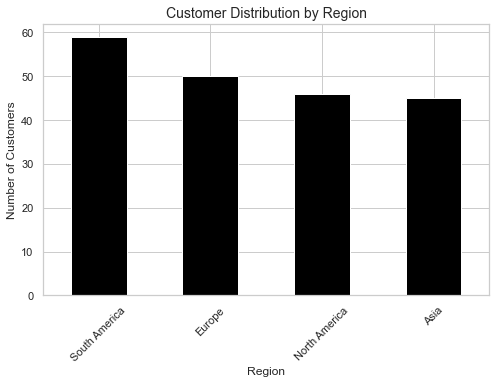

In [48]:
plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='black')
plt.title('Customer Distribution by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

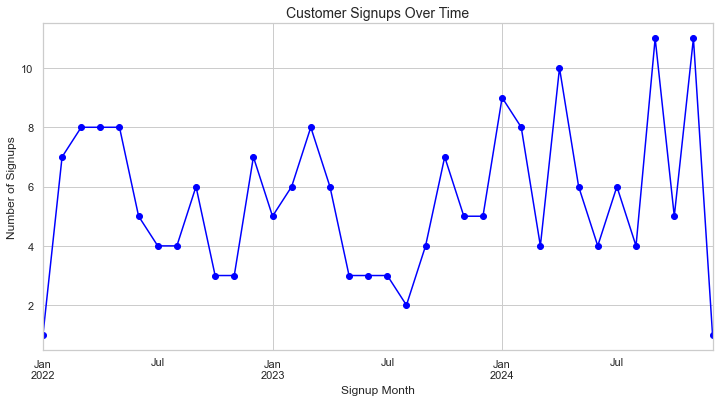

In [51]:
#analyze signup trends Over time using a line plot.
plt.figure(figsize=(12, 6))
signups_over_time.plot(kind='line', marker='o', color='blue')
plt.title('Customer Signups Over Time', fontsize=14)
plt.xlabel('Signup Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid(True)
plt.show()